## Import Libraries

In [ ]:
# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Libraries for Feature Processing
from sklearn.preprocessing import StandardScaler, Normalizer,RobustScaler,PolynomialFeatures, MinMaxScaler,LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

## Load The Data

In [ ]:
data = pd.read_csv('/content/student_habits_performance.csv')
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
## Number of Rows and Columns
data.shape

(1000, 16)

In [ ]:
## Names of the Columns
data.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [ ]:
## Drop unuseful Columns
data.drop(['student_id','gender','diet_quality',
                             'parental_education_level', 'internet_quality',
                        'extracurricular_participation'], axis=1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1000 non-null   int64  
 1   study_hours_per_day    1000 non-null   float64
 2   social_media_hours     1000 non-null   float64
 3   netflix_hours          1000 non-null   float64
 4   part_time_job          1000 non-null   object 
 5   attendance_percentage  1000 non-null   float64
 6   sleep_hours            1000 non-null   float64
 7   exercise_frequency     1000 non-null   int64  
 8   mental_health_rating   1000 non-null   int64  
 9   exam_score             1000 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 78.3+ KB


In [ ]:
## Number of Missing values per column in %
data.isna().sum()/1000*100

,0
age,0.0
study_hours_per_day,0.0
social_media_hours,0.0
netflix_hours,0.0
part_time_job,0.0
attendance_percentage,0.0
sleep_hours,0.0
exercise_frequency,0.0
mental_health_rating,0.0
exam_score,0.0


## EXPLORE DATA DISTRIBUTION

In [ ]:
data.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


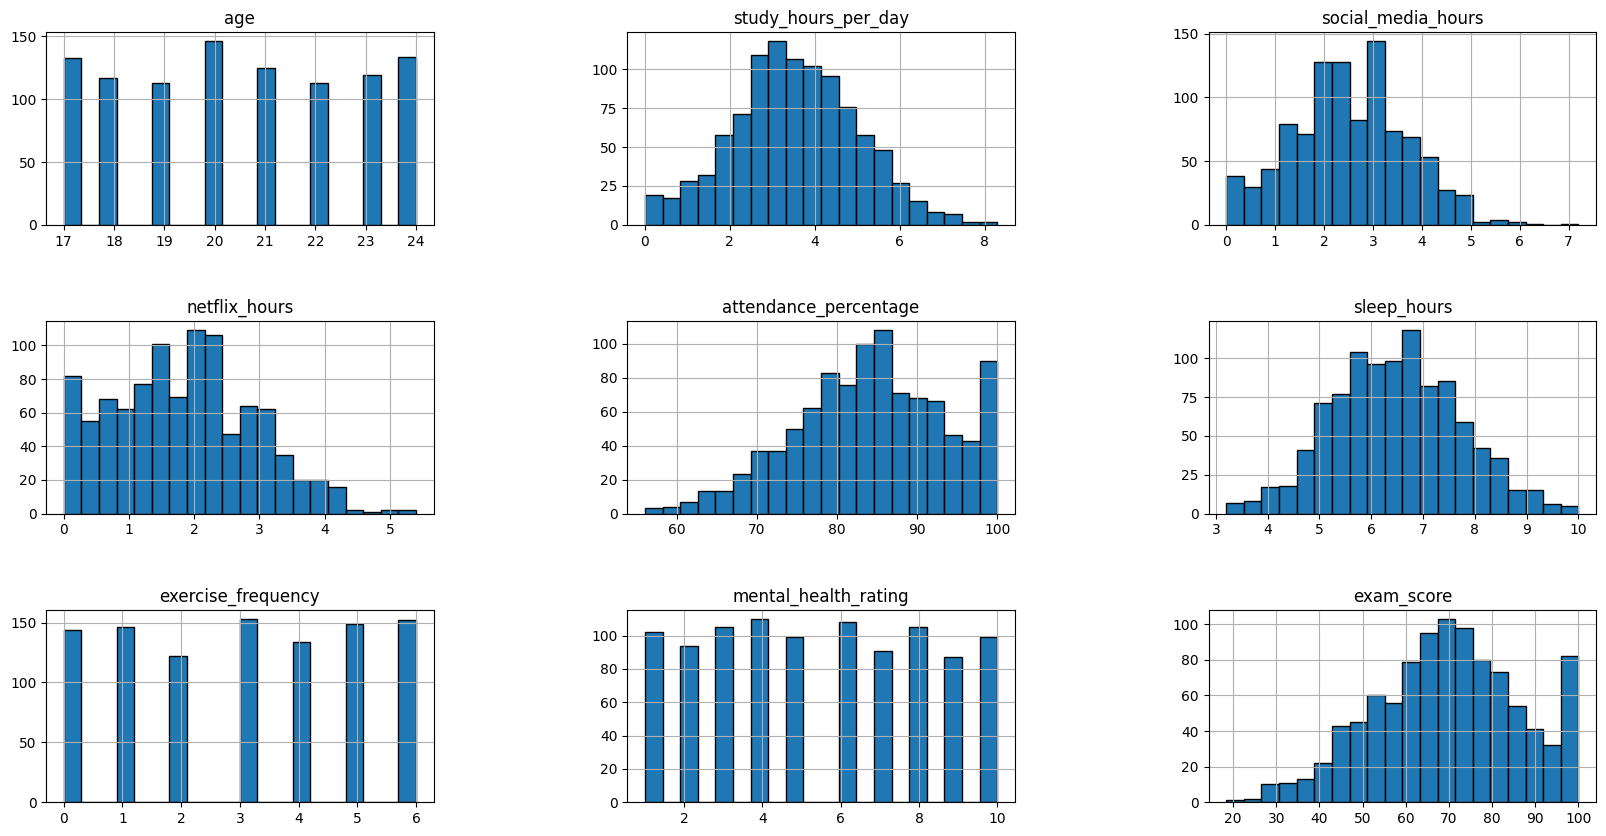

In [ ]:
## Histogram
data.hist(figsize=(20,10),bins=20, edgecolor='black')
plt.subplots_adjust(hspace=0.5,wspace=0.5)

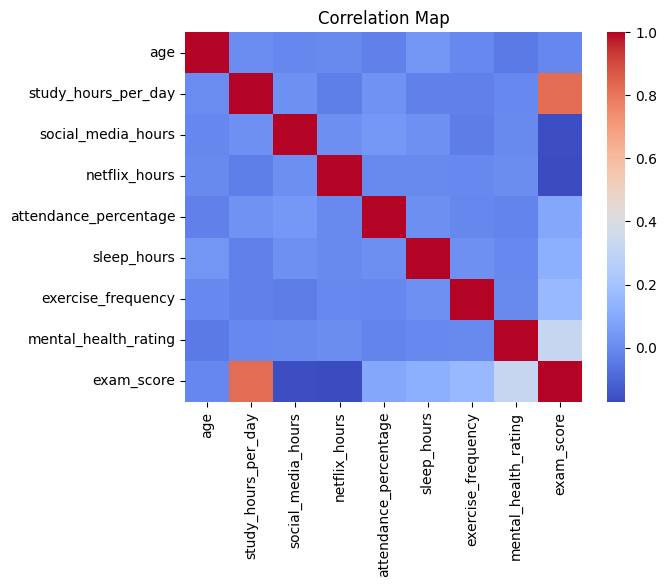

In [ ]:
## Plot Heatmap to display Correlation
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

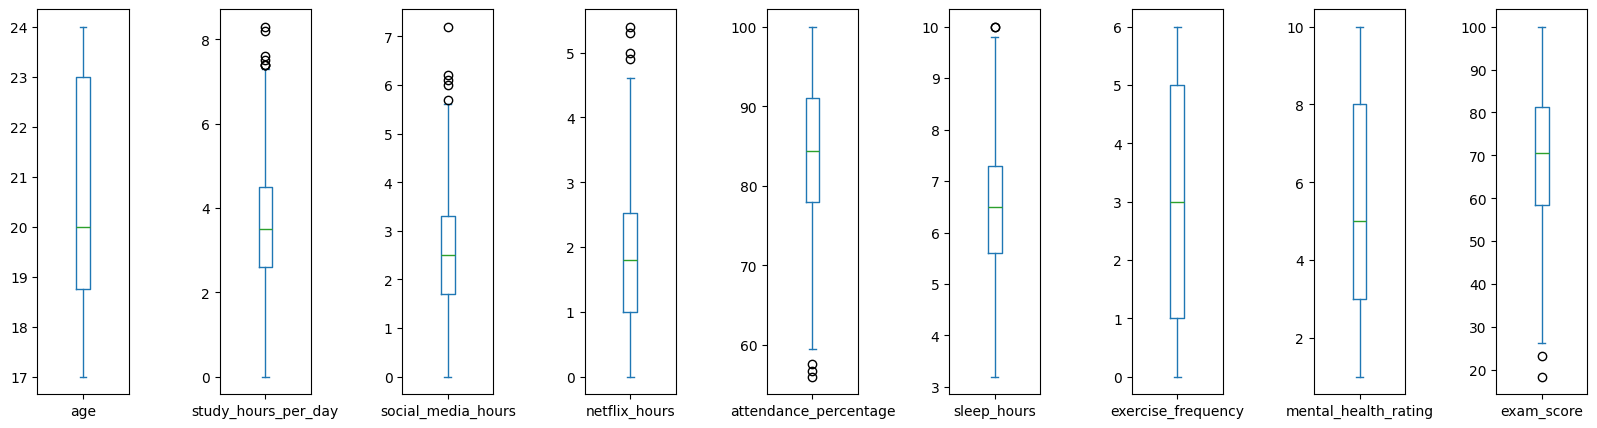

In [ ]:
## Boxplot to identify Outliers
data.plot(kind='box',subplots= True, sharey=False, figsize=(20,5))
plt.subplots_adjust(wspace=1)

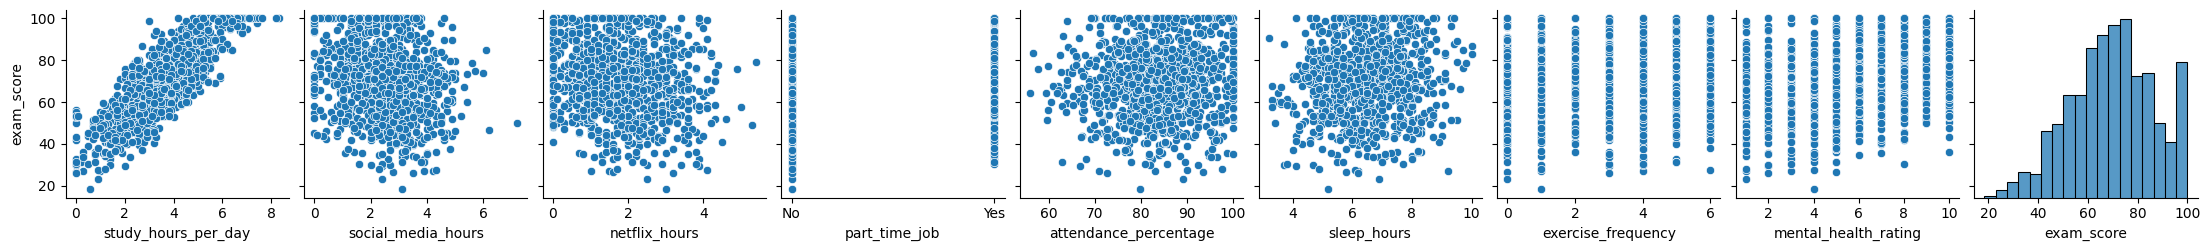

In [ ]:
## Relatioship between variables
sns.pairplot(data=data,
             x_vars=data.columns[1:15],
             y_vars='exam_score')

## Preprocessing

In [ ]:
## Encoding
le = LabelEncoder()
data['part_time_job'] = le.fit_transform(data['part_time_job'])

In [ ]:
# Scale the data
scaler = MinMaxScaler()
X = scaler.fit_transform(data.drop(['exam_score'],axis=1))
X = pd.DataFrame(X,columns=data.drop(['exam_score'],axis=1).columns)

## Modelling

In [ ]:
## Define y and split data
y = data.exam_score
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=.3)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(700, 9) (700,) (300, 9) (300,)


In [63]:
## Fit a Model
line= LinearRegression()
line.fit(x_train,y_train)
y_hart = line.predict(x_test)
r2_score(y_hart,y_test)


0.883456982631404

In [44]:
## Cross validated
score = cross_val_score(LinearRegression(),x_train,y_train,cv=5,scoring='r2')
print(score,score.mean())


[0.8937341  0.89683757 0.88372343 0.92754981 0.88786668] 0.8979423184180231


In [48]:
## Ridge regression
pipe = make_pipeline(Ridge(alpha=0.1))
scores = cross_val_score(pipe,x_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())

[0.89377659 0.89626962 0.88404035 0.92738129 0.88812158] 0.8979178854064032


In [49]:
## Lasso regression
pipe = make_pipeline(PolynomialFeatures(degree=1),
                          StandardScaler(),
                          Lasso(alpha=1e-1))
scores = cross_val_score(pipe,x_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())


[0.89567793 0.89488184 0.88437536 0.92647203 0.88785519] 0.8978524682256802


In [50]:
# Another regression model
from sklearn.ensemble import RandomForestRegressor
pipe = make_pipeline(PolynomialFeatures(degree=1),Normalizer(),RandomForestRegressor())
scores = cross_val_score(pipe,x_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())

[0.82935158 0.82295677 0.7742268  0.8610384  0.81907307] 0.8213293240133659
